# Análise da Ocupação e Preço de Anúncios no Airbnb

## O Airbnb
É um serviço oferecido como uma plataforma de aluguel de hospedagens, que possibilita que as pessoas ofereçam ou reservem acomodações ao pelo mundo todo. Essa plataforma possui como uma de suas características, oferecer alternativas às hospedagens tradicionais, como casas e apartamentos presentes em bairros residenciais no Brasil e em diverssos países. De acordo com a cidade, período de locação e da opção escolhida, é possível ter uma hospedagem muito mais em conta do que em hoteis.

## Sobre os Dados
O município brasileiro de Florianópolis-SC é muito procurado por turistas de todos os lugares, onde os serviços do Arbnb também recebem muita procura. A partir de um conjunto de dados do Airbnb referente a alguns bairros de Florianópolis, que contém informações sobre ocupação e anúncios, é que serão respondidas algumas questões através da Análise de Dados.

A Análise de Dados é uma forma de utilizar de técnicas estatísticas e lógicas para avaliar informações obtidas por meio de determinados processos. Obter informações úteis a partir dos dados é o principal objetivo dessa prática. Por meio destas informações, pode-se tomar decisões mais assertivas e orientadas para resultados. 


## Questões a Serem Respondidas

1) Ordenar os bairros em ordem crescente de número de listings(anúncios).

2) Ordenar os bairros em ordem crescente de faturamento(soma do preço das datas alugadas) médio dos listings.

3) Existem correlações entre as características de um anúncio e seu faturamento? Quais? Explique.

4) Qual a antecedência média das reservas? Esse número é maior ou menor para finais de semana?


### Importando as Bibliotecas Necessárias

In [1]:
import pandas as pd  
import numpy as np  
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

### Importando os Arquivos csv e Criando os DataFrames

In [2]:
df1 = pd.read_csv('desafio_priceav.csv')
df2 = pd.read_csv('desafio_details.csv')

Visualizando as três primeiras linhas dos dois DataFrames.

In [3]:
df1.head(3)

,Unnamed: 0,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied
0,0,2148,40201349,blank,2020-11-15,250.0,0
1,1,2159,40201349,blank,2020-11-26,250.0,0
2,2,2160,40201349,blank,2020-11-27,250.0,0


In [4]:
df2.head(3)

,Unnamed: 0,airbnb_listing_id,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,31389869,Jurerê,Lindo Apartamento em Jurerê,2.0,2.0,5.0,False,15.0
1,1,40010667,Canasvieiras,"Residencial Arruda, 1 quarto",1.0,1.0,NaN,False,0.0
2,2,38905997,Ingleses,Apartamento NOVO Completo - Moderno e Sofisticado,1.0,1.0,4.5,True,13.0


### Explorando os Conjuntos de Dados
A visão exploratória feita previamente auxilia na realização de qualquer análise e um conjunto de dados.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354520 entries, 0 to 354519
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         354520 non-null  int64  
 1   Unnamed: 0.1       354520 non-null  int64  
 2   airbnb_listing_id  354520 non-null  int64  
 3   booked_on          354520 non-null  object 
 4   date               354520 non-null  object 
 5   price_string       354520 non-null  float64
 6   occupied           354520 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 18.9+ MB


df1:
+ O arquivo possui 354520 linhas e 7 colunas
+ Quatro colunas possuem valores do tipo inteiros(int64)
+ Duas colunas apresentam dados do tipo categórico(object)
+ Apenas uma coluna possui dados do tipo pontos flutuantes(float64)
+ Não há dados nulos
+ O tamanho do arquivo é de 9.5KB

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4691 entries, 0 to 4690
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4691 non-null   int64  
 1   airbnb_listing_id    4691 non-null   int64  
 2   suburb               4691 non-null   object 
 3   ad_name              4691 non-null   object 
 4   number_of_bedrooms   4508 non-null   float64
 5   number_of_bathrooms  4690 non-null   float64
 6   star_rating          2570 non-null   float64
 7   is_superhost         4691 non-null   bool   
 8   number_of_reviews    4684 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 297.9+ KB


df2:
+ O arquivo possui 4691 linhas e 9 colunas
+ Quatro colunas apresentam dados do tipo pontos flutuantes(float64)
+ Duas colunas possuem valores do tipo inteiros(int64)
+ Outras duas colunas contém dados do tipo categóricos(object)
+ Uma das colunas traz dados do tipo booleanos(bool)
+ Quatro colunas mostram um número linhas menor que 4691, indicativo de valores nulos
+ O tamanho do arquivo é de 9.5KB

Conferindo os dados nulos presentes no df2 através da soma desses valores em cada coluna.

In [7]:
df2.isnull().sum()

Unnamed: 0                0
airbnb_listing_id         0
suburb                    0
ad_name                   0
number_of_bedrooms      183
number_of_bathrooms       1
star_rating            2121
is_superhost              0
number_of_reviews         7
dtype: int64

A coluna "star_rating" possui uma grande quantidade de valores nulos(2121), seguida de "number_of_bedrooms"(183), "number_of_reviews" com 7 e "number_of_bathrooms" com apenas 1 valor nulo.

Para responder as questões dessa análise, ambos arquivos devem ser analisados em um mesmo DataFrame. Isso é possivel de ser realizado, pois as duas tabelas possuem uma coluna com o identificador do anúncio em comum(airbnb_listing_id). Esse idenficador é será o elo entre as duas tabelas.

#### Unindo os Dois Arquivos em Único DataFrame

In [8]:
df = pd.merge(df1, df2, how = 'inner', on = 'airbnb_listing_id')
df.head(3) # Exibindo as três primeiras linhas do novo DataFrame 

,Unnamed: 0_x,Unnamed: 0.1,airbnb_listing_id,booked_on,date,price_string,occupied,Unnamed: 0_y,suburb,ad_name,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,0,2148,40201349,blank,2020-11-15,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
1,1,2159,40201349,blank,2020-11-26,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0
2,2,2160,40201349,blank,2020-11-27,250.0,0,349,Ingleses,Excelente apartamento de dois dormitórios.,2.0,2.0,NaN,False,0.0


#### Ocultando Colunas 

In [9]:
df = df.drop(df.columns[[0, 1, 2, 7, 9]], axis=1)

In [10]:
df.head(3)

,booked_on,date,price_string,occupied,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,blank,2020-11-15,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0
1,blank,2020-11-26,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0
2,blank,2020-11-27,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0


#### Transformando Dados da Coluna "booked_on" de Texto para DateTime

Na coluna "booked_on", antes de converter os dados para o formato DateTime, é preciso substituir as linhas com o caracter "blank" para espaços vazios. Isso é necessário para que não haja erros na conversão.

In [11]:
df['booked_on'] = df['booked_on'].str.replace('blank','')

Convertendo os dados das Colunas de Data object para DateTime

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['booked_on'] = pd.to_datetime(df['booked_on'])

Verificando como ficou o DataFrame depois dos ajustes

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354520 entries, 0 to 354519
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   booked_on            164951 non-null  datetime64[ns]
 1   date                 354520 non-null  datetime64[ns]
 2   price_string         354520 non-null  float64       
 3   occupied             354520 non-null  int64         
 4   suburb               354520 non-null  object        
 5   number_of_bedrooms   338908 non-null  float64       
 6   number_of_bathrooms  354446 non-null  float64       
 7   star_rating          217529 non-null  float64       
 8   is_superhost         354520 non-null  bool          
 9   number_of_reviews    354093 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 27.4+ MB


* As colunas desnecessárias para a análise foram ocultadas
* O formato das colunas de datas agora está como DateTime
* O DataFrame geral ppossui agora dez colunas

In [14]:
df.head(3) # Exibindo as três primeiras linhas

,booked_on,date,price_string,occupied,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews
0,NaT,2020-11-15,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0
1,NaT,2020-11-26,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0
2,NaT,2020-11-27,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0


### 1. Ordene os bairros em ordem crescente de número de listings(anúncios).

A resposta da primeira questão surge com a soma do número de linhas de cada bairro, cada linha do DataFrame também representa um listing(anúncio).

In [15]:
df.suburb.value_counts() # Somando o número de listings de cada bairro

Ingleses              176864
Canasvieiras           92186
Jurerê                 42857
Lagoa da Conceição     23431
Centro                 19182
Name: suburb, dtype: int64

Gráfico representando o número de anúncios de cada bairro.

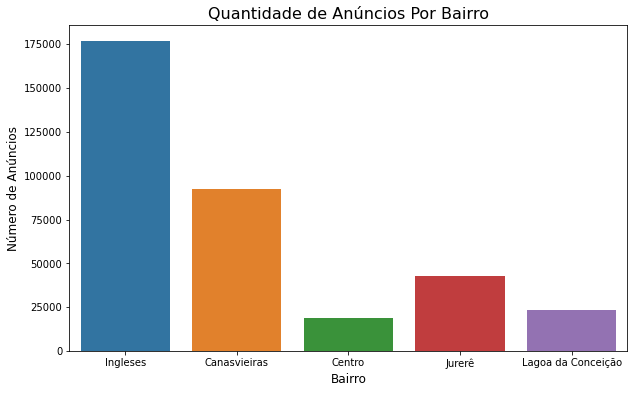

In [39]:
plt.figure(figsize=(10,6))
plt.title('Quantidade de Anúncios Por Bairro', fontsize=16)
sns.countplot( x = df.suburb)
plt.xlabel('Bairro', fontsize=12)
plt.ylabel('Número de Anúncios', fontsize=12)
plt.show()

Ingleses é de longe o bairro com maior quantidade anúncios(176864), seguido por Canasvieiras(92186), já o centro de Florianópolis apresenta a menor quantidade(19182).

### 2. Ordene os bairros em ordem crescente de faturamento(soma do preço das datas alugadas) médio dos listings.

Usando a função "groupby" para calcular a média dos preços dos anúncios de cada bairro.

In [17]:
df.groupby('suburb')['price_string'].mean().nlargest()

suburb
Jurerê                406.074854
Ingleses              350.371020
Canasvieiras          292.571139
Lagoa da Conceição    250.514148
Centro                219.088990
Name: price_string, dtype: float64

Mesmo com Ingleses sendo o bairro com mais anúncios, Jurerê é o bairro que possui o maior faturamento médio. O centro também fica em úlrtima posição em relação ao faturamento médio.

### 3. Existem correlações entre as características de um anúncio e seu faturamento? Quais? Explique.

A utilização do método da correlação é uma forma de dectar se existe interdependência entre duas ou mais variáveis. Umas das alternativas mais comuns é a correlação de Pearson, que mede a associação linear entre variáveis contínuas. Através dos índices do método de Pearson é possivel saber o quanto a relação entre as variáveis pode ser descrita por uma reta.

Para saber se há correlação entre as características de um anúncio e seu faturamento, seram utilisadas apenas as colunas referentes ao preço ofertado(price_string), quantidade de Quartos(number_of_bedrooms), número de banheiros(number_of_bathrooms) e quantidade de comentários(number_of_reviews).

Anteriormente foi verificado que existem dados nulos em quatro colunas do DataFrame geral que esta sendo trabalhado(df1+df2), até o momento esses valores não influenciaram na análise, motivo pelo qual não foram alterados. Para garantir a qualidade da análise, a correlação das váriaveis será feita de duas formas: a primeira incluindo os valores nulos e a segunda com as linhas dos dados nulos removidos. Dessa forma é possivel saber o grau d einfluência dos valores nulos na correlação.

#### Criando DataFrame para Correlação

In [18]:
c1 = df[['price_string','number_of_bedrooms','number_of_bathrooms','number_of_reviews']]
c1.head(3) # Exibindo primeiras três linhas

,price_string,number_of_bedrooms,number_of_bathrooms,number_of_reviews
0,250.0,2.0,2.0,0.0
1,250.0,2.0,2.0,0.0
2,250.0,2.0,2.0,0.0


DataFrame c1 | Valores Nulos, Linhas e Colunas

In [19]:
c1.isnull().sum() # Valores Nulos

price_string               0
number_of_bedrooms     15612
number_of_bathrooms       74
number_of_reviews        427
dtype: int64

In [20]:
c1.shape # Linhas e Colunas

(354520, 4)

DataFrame c2 | Valores Nulos, Linhas e Colunas

In [21]:
c2 = c1.dropna() # DataFrame c2

In [22]:
c2.isnull().sum() # Valores Nulos

price_string           0
number_of_bedrooms     0
number_of_bathrooms    0
number_of_reviews      0
dtype: int64

In [23]:
c2.shape # Linhas e Colunas

(338407, 4)

Verificando a correlação entre as variáveis dos dois DataFrames

In [24]:
c1.corr()

,price_string,number_of_bedrooms,number_of_bathrooms,number_of_reviews
price_string,1.000000,0.428481,0.429739,-0.141430
number_of_bedrooms,0.428481,1.000000,0.744669,-0.098852
number_of_bathrooms,0.429739,0.744669,1.000000,-0.099048
number_of_reviews,-0.141430,-0.098852,-0.099048,1.000000


In [25]:
c2.corr()

,price_string,number_of_bedrooms,number_of_bathrooms,number_of_reviews
price_string,1.000000,0.426899,0.422960,-0.129516
number_of_bedrooms,0.426899,1.000000,0.744324,-0.098599
number_of_bathrooms,0.422960,0.744324,1.000000,-0.085282
number_of_reviews,-0.129516,-0.098599,-0.085282,1.000000


A remoção dos dados nulos(16113 linhas) não fez diferença para o resultado sobre a correlação das variáveis.  

Os resultados mostras uma fraca correlação dos faturamentos dos anúncios com o quantidade de quartos e de banheiros, isso se deve pelo valor do índice de ambas as variáveis serem menor que 0,5, pois quanto mais perto de 1,0, maior é correlação. O número de avaliações não tem correlação com o faturaramento dos anúncios, o valor de -0,12 sustenta essa afirmação.

### 4. Qual a antecedência média das reservas? Esse número é maior ou menor para finais de semana?

A partir do valor médio do resultado da subtração das datas alugadas("date") com as datas reservadas("booked_on"), é possivel conhecer a antecedência média dessas reservas. Os valores das colunas "date" e "booked_on" foram convertidos anteriomente para o formato DateTime, o que permite já realizar as operações com essas variáveis.

Gerando a variável Antecedência.

In [26]:
da = df.date # DataFrame Período Alugado
dr = df.booked_on # DataFrame Reservas
an = da - dr # Antecedência
df['antec_reserva'] = an # Antecedência adicionado como coluna ao DataFrame geral

In [27]:
df.head(3) # Exibindo primeiras linhas

,booked_on,date,price_string,occupied,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,antec_reserva
0,NaT,2020-11-15,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,NaT
1,NaT,2020-11-26,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,NaT
2,NaT,2020-11-27,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,NaT


A antecedência das reservas foi adicionada como coluna ao DataFrame geral. Para garantir a qualidade dos resultados, agora é importante conferir as caracteristicas dessa nova variável através da estatistica descritiva.

In [28]:
df.antec_reserva.describe() # Estatística Descritiva da Variável 

count                        164951
mean     32 days 08:26:27.787888524
std      71 days 14:13:17.961118661
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 6 days 00:00:00
75%                34 days 00:00:00
max              7644 days 00:00:00
Name: antec_reserva, dtype: object

A estatística descritiva mostra a presença de outliers  na variável. Essa idéia é confirmada por dois apontamentos importantes: o desvio padrão possui um valor muito alto em relação a média, o segundo é a quantidade máxima de dias de antecedência(7644) indicando reservas feitas a mais de 20 anos.

Os outliers podem  trazer distorções para as análises, pois são informações distantes em relação a um conjunto de dados. Para garantir que os resultados não sejam afetados, esses outliers devem ser identificados e separados da análise.

Como já é conhecido que existem dados de reservas feitas com muitos anos(outiliers), é preciso conhecer as linhas do DataFrame geral com as datas de reserva mais antigas.

#### Detectando as Linhas com os Outliers

In [29]:
df.nlargest(10, 'antec_reserva') # Conhecendo as dez reservas mais antigas

,booked_on,date,price_string,occupied,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,antec_reserva
250876,2000-01-01,2020-12-05,232.0,1,Ingleses,NaN,1.0,NaN,False,2.0,7644 days
250892,2000-01-01,2020-12-05,232.0,1,Ingleses,NaN,1.0,NaN,False,2.0,7644 days
76559,2000-01-01,2020-11-13,320.0,1,Canasvieiras,1.0,1.0,NaN,False,1.0,7622 days
120662,2020-03-01,2021-03-06,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,370 days
120661,2020-03-01,2021-03-05,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,369 days
50439,2020-03-02,2021-03-05,270.0,1,Canasvieiras,1.0,1.0,4.5,False,4.0,368 days
120660,2020-03-01,2021-03-04,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,368 days
120659,2020-03-01,2021-03-03,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,367 days
50437,2020-03-02,2021-03-03,270.0,1,Canasvieiras,1.0,1.0,4.5,False,4.0,366 days
120658,2020-03-01,2021-03-02,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,366 days


Os outliers representam apenas três linhas dos DataFrame geral, ambas informam reservas feitas com mais de 20 anos de antecedencia, o que significa que esses valores estão incorretos, pois ninguém realiza reservas com essa quantidade de anos. Como são apenas três linhas, é possível que elas não interfiram nos resultados de forma expressiva, mas nesse caso o mais adequado é que elas ainda sejam removidas das análises posteriores.

#### Removendo os Outliers

In [31]:
df = df.drop(df.index[[250876,250892,76559]]) # Excluidno as três linhas com erro do DataFrame
df.nlargest(5, 'antec_reserva') # Exibindo as cinco rerservas mais antigas

,booked_on,date,price_string,occupied,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,antec_reserva
120662,2020-03-01,2021-03-06,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,370 days
120661,2020-03-01,2021-03-05,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,369 days
50439,2020-03-02,2021-03-05,270.0,1,Canasvieiras,1.0,1.0,4.5,False,4.0,368 days
120660,2020-03-01,2021-03-04,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,368 days
120659,2020-03-01,2021-03-03,475.0,1,Canasvieiras,2.0,2.0,NaN,False,1.0,367 days


#### Descobrindo a Antecedência Média das Reservas

Com os outliers removidos, agora é hora de verificar a antecedência média das reservas.

In [32]:
df.antec_reserva.mean()

Timedelta('32 days 05:07:18.334505420')

Em média as reservas são feitas com 32 dias e cinco horas de antecedência. Agora é preciso saber se essas reservas são maiores nos fins de semana.

#### Criando a Variável Dia
Essa variável identifica o dia da semana de cada reserva feita.

In [33]:
dia = df.date.dt.weekday # Criando DataFrame da variável "dia"
df['dia'] = dia # Adicionado nova coluna "dia" ao DataFrame geral
df[['dia']] = df[['dia']].astype(str) # Transformando coluna "dia" em texto(object)

Substituindo os números que representam os dias da semana por nomes.

In [34]:
df['dia'] = df['dia'].str.replace('0','Seg') # Segunda-feira
df['dia'] = df['dia'].str.replace('1','Ter') # Terça-feira
df['dia'] = df['dia'].str.replace('2','Qua') # Quarta-feira
df['dia'] = df['dia'].str.replace('3','Qui') # Quinta-feira
df['dia'] = df['dia'].str.replace('4','Sex') # Sexta-feira
df['dia'] = df['dia'].str.replace('5','Sab') # Sábado
df['dia'] = df['dia'].str.replace('6','Dom') # Domingo

Preparando os dados da variável antecedência para ficarem compativeis as operações com as reservas.

In [35]:
df[['antec_reserva']] = df[['antec_reserva']].astype(str) # Transformando coluna em texto
df['antec_reserva'] = df['antec_reserva'].str.replace('days','') # Removendo caractere "days"
df['antec_reserva'] = df['antec_reserva'].str.replace('NaT','0') # Substituindo valores nulos por 0
df['antec_reserva'] = df['antec_reserva'].astype(int) # Transformando coluna em números
df.groupby('dia')['antec_reserva'].sum() # Somando os dias de antecedência de cada dia da semana

dia
Dom    780611
Qua    726838
Qui    732408
Sab    810071
Seg    742770
Sex    786245
Ter    734594
Name: antec_reserva, dtype: int32

Agora os dados dos dias da semana das reservas("dia") e antecedência("antec_reserva") já estão prontos para seguir com as análises.

In [40]:
df.head() # Verificando como ficaram os colunas no DataFrame geral.

,booked_on,date,price_string,occupied,suburb,number_of_bedrooms,number_of_bathrooms,star_rating,is_superhost,number_of_reviews,antec_reserva,dia
0,NaT,2020-11-15,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,0,Dom
1,NaT,2020-11-26,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,0,Qui
2,NaT,2020-11-27,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,0,Sex
3,NaT,2020-12-10,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,0,Qui
4,NaT,2021-02-01,250.0,0,Ingleses,2.0,2.0,NaN,False,0.0,0,Seg


#### Antecedência Média das Reservas Entre os Dias de Semana
Utilizando novamente a função "groupby" para chegar ao resultado na últma pergunta, com o calculo da média dos dias de antecedência de cada dia da semana, depois ordenados do maior para o menor.

In [48]:
df.groupby('dia')['antec_reserva'].mean().nlargest()

dia
Sab    15.784396
Sex    15.285592
Dom    15.176945
Qui    14.954427
Qua    14.856471
Name: antec_reserva, dtype: float64

Domingo, sexta e sabádo possuem os maiores valores médios de reservas feitas. A partir desses resultados, pode-se afirmar que as pessoas realizam reservas com maior dias de antecedência principalmente aos fins de semanas, período que a maioria das pessoas tira folga de suas atividades.

### Conclusões

Os principais resultados da análise mostram que: 

- A maior quantidade de anúncios não representa maior faturamento nos bairros, como é o caso do bairro Ingleses, que têm é o primeiro em número de anúncios, mas o segundo em faturamento. Já Jurerê que aparece como o terceiro na quantidades de anúncios detém o maior faturamento.


- A correlação entre as caracteristicas do anúncio e o faturamento é fraca, pois a quantidade de quartos e banheiros, apresentou um índice de correlação menor de 0,42, o ideal era ser maior que 0,5 pois quanto mais perto de 1,0, maior é correlação. O índice de -0,12 aponta que não existe correlação com o faturaramento dos anúncios e número de avaliações.


- Em média as reservas pelo Airbnb são feitas com 32 dias e cinco horas de antecedência nos bairros de Florianópolis analisados, principalmente nos fins de semana. Domingo, sexta e sabádo possuem os maiores valores médios de reservas feitas, pois é quando a maioria das pessoas está de folga de suas atividades.